In [1]:
# Importing essential Python libraries

import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('wineQualityReds.csv')

In [3]:
data.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1599 non-null   int64  
 1   fixed.acidity         1599 non-null   float64
 2   volatile.acidity      1599 non-null   float64
 3   citric.acid           1599 non-null   float64
 4   residual.sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free.sulfur.dioxide   1599 non-null   float64
 7   total.sulfur.dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [5]:
# Drop irrelevant columns
data.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
#  view some basic statistical details 
data.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
# Correlation of every other feature w.r.t the quality of the wine
data.corr()['quality']

fixed.acidity           0.124052
volatile.acidity       -0.390558
citric.acid             0.226373
residual.sugar          0.013732
chlorides              -0.128907
free.sulfur.dioxide    -0.050656
total.sulfur.dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

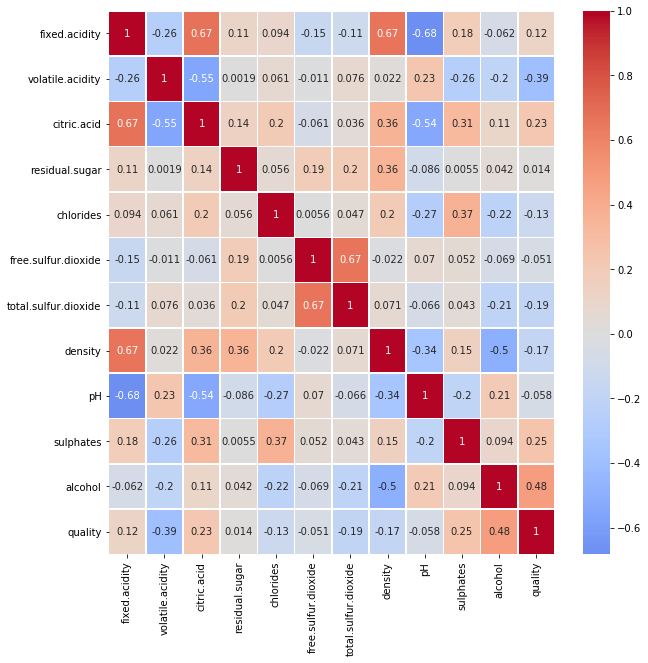

In [16]:
# Heatmap of correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,center=0,cmap='coolwarm')

plt.show()

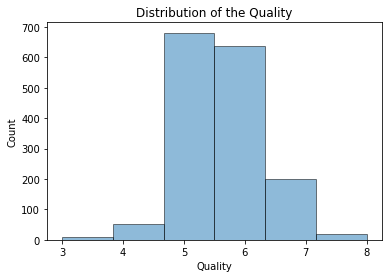

In [17]:
# Distribution of the quality of the wine
plt.hist(data.quality,bins=6,alpha=0.5,histtype='bar',ec='black')
plt.title('Distribution of the Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
#plt.show()

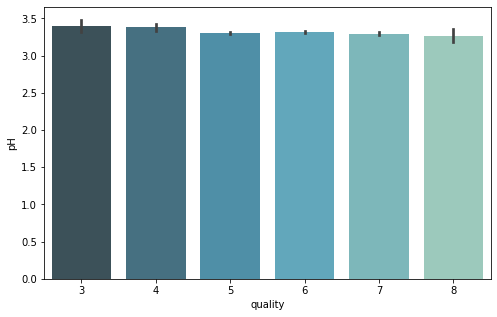

In [18]:
# Barplot of qulaity vs ph 
plt.figure(figsize=(8,5))
sns.barplot(data['quality'],data['pH'],palette="GnBu_d")
plt.show()

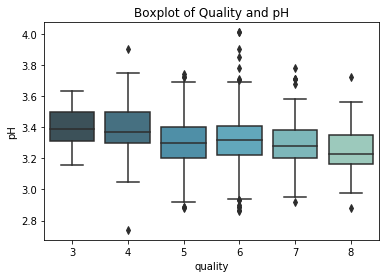

In [19]:
sns.boxplot(x='quality',y='pH',data=data,palette='GnBu_d')
plt.title("Boxplot of Quality and pH")
plt.show()

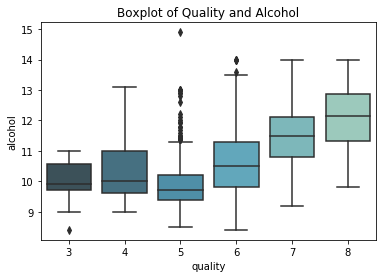

In [20]:
ax = sns.boxplot(x='quality',y='alcohol',data=data,palette='GnBu_d')
plt.title("Boxplot of Quality and Alcohol")
plt.show()

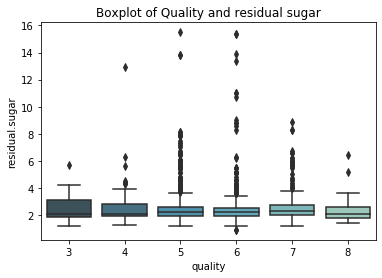

In [21]:
sns.boxplot(x="quality",y="residual.sugar",data=data,palette="GnBu_d")
plt.title("Boxplot of Quality and residual sugar")
plt.show()

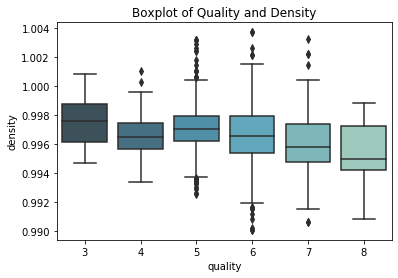

In [22]:
sns.boxplot(x="quality",y="density",data=data,palette="GnBu_d")
plt.title("Boxplot of Quality and Density")
plt.show()

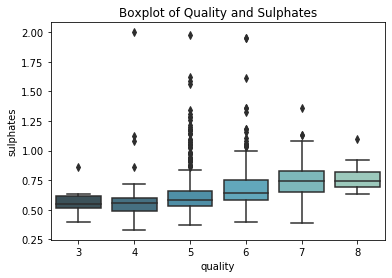

In [23]:
sns.boxplot(x="quality",y="sulphates",data=data,palette="GnBu_d")
plt.title("Boxplot of Quality and Sulphates")
plt.show()

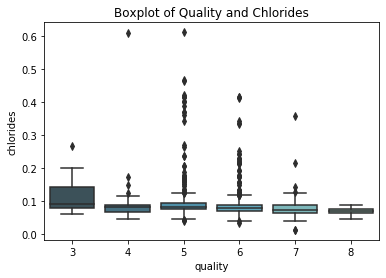

In [24]:
sns.boxplot(x="quality",y="chlorides",data=data,palette="GnBu_d")
plt.title("Boxplot of Quality and Chlorides")
plt.show()

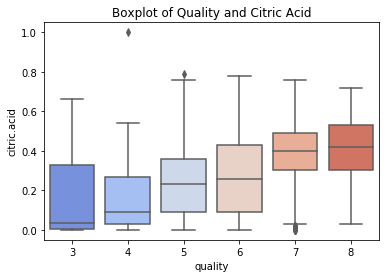

In [25]:
sns.boxplot(x="quality",y="citric.acid",data=data,palette="coolwarm")
plt.title("Boxplot of Quality and Citric Acid")
plt.show()

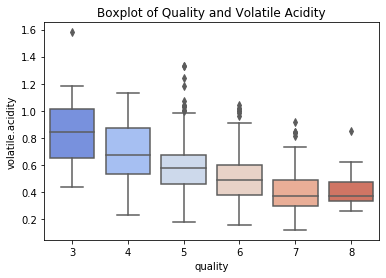

In [26]:
sns.boxplot(x="quality",y="volatile.acidity",data=data,palette="coolwarm")
plt.title("Boxplot of Quality and Volatile Acidity")
plt.show()

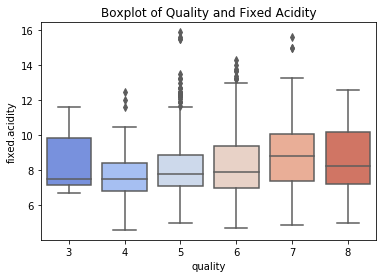

In [27]:
sns.boxplot(x="quality",y="fixed.acidity",data=data,palette="coolwarm")
plt.title("Boxplot of Quality and Fixed Acidity")
plt.show()